# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [41]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [42]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [43]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3758823883522957
rmse median 0.44747235779468375


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [44]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [45]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.16137871901956513
mean error unbiased -0.021608505522825963


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [46]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

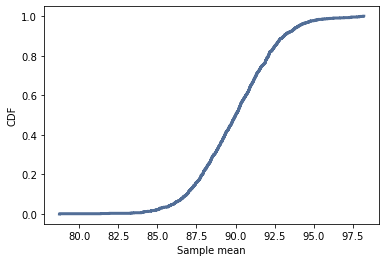

In [47]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [48]:
np.mean(xbars)

89.99384354858667

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [49]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(86.03347962415961, 93.99969403453062)

And the RMSE of the sample means is called the standard error.

In [50]:
stderr = RMSE(xbars, 90)
stderr

2.5179188380256323

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [51]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0851168974143606
rmse Lm 1.4873881147700632
mean error L 0.3254591706469689
mean error Lm 0.3620079967393187


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [52]:
# Solution goes here
## It looks like we are now doing more iterations I think this is leading
## up to Central limit theorem ideas. As we increase the number of times
## we pull samples we get less error and approach the Population mean.
## As you can see here the error has decreased from when we did it with 1000.

def Estimate4(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

Estimate4()

Experiment 1
mean error xbar -0.0009575016479079497
mean error median 0.0003770912523766107


In [53]:
# Solution goes here
# Same idea here we increase the number of iterations for the RMSE
# Now we are seeing better results.
# I was a little surprised by the complexity of the code in this section.
# But I did understand why they did what they did.

def Estimate5(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.5142500320102037
RMSE unbiased 0.5747469916981733


In [54]:
'''
(Results for 8-1)
At this point, I need to summarize what I have seen so far.
We calculated the Root Mean Squared Error using 1000 iterations from a sample size of 7.

Experiment 1
rmse xbar 0.3852090014216372
rmse median 0.47141645936452126

The median is essential to know in the presence of outliers. Next we try and find the mean.
If the median matches the mean we would know that the distribution could be normal.

Again 1000 iterations from a sample size of 7.

Estimate 2
mean error biased -0.13667214416261209
mean error unbiased 0.007215831810285881

We are getting rather large value for the mean error, so it must be biased. If it were less than .001 I would feel
better about the error we are finding. The unbiased one is pretty decent lower than an alpha level of .05.
We find that after sampling many experiments that our estimate is close to the mean.

We get:
90.12479133231862
This value is relatively close to 90. I believe 90 was our expected value for the mean.
We want to find out what values contain the inner 90% of our population. So we have to convert backward using cdf.Percentile We find that 90% of our population lives within the values.

(86.05445221498364, 94.21231243509749)

If our actual mean was 90 notice how we have captured it within our confidence interval. :)

We should also note that our root mean squared error was
2.5501015789281234

I believe that means that our confidence interval can fluctuate based on RMSE error. So considering the extremes, it can vary by 2.55 around the above confidence interval constraints.

After this, we switch to an exponential model to see if it fits our sample better.
Again sample size of 7 with 1000 iterations.

We can immediately see some differences.
rmse L 1.094697043216661
rmse Lm 1.5163115276982715
mean error L 0.3123784427327108
mean error Lm 0.363589905934005

The root mean squared error goes down to 1.09 from our 2.55. The log mean is also a better estimate than our original CDF coming in at 1.51. But there is still error, and our estimator is still biased.
Ideally, we would try and get more samples, but sometimes we don’t have that option. So the next best thing is to use what we have and just do more testing with those values. So from here on out we will use 100000 iterations instead of 1000.

Experiment 1 (Using more iterations.)
mean error xbar -0.0013416386830891623
mean error median -0.0013023511068377131

This out performed our previous results when we used 1000 iterations. (Old results shown here)
rmse xbar 0.3852090014216372
rmse median 0.47141645936452126

The strange this is the bias went up. This was unexpected. (Its possible I don't understand the results here.) Maybe because we only have 7 in our sample size we are creating more bias?

Experiment 2
RMSE biased 0.5162074619740702
RMSE unbiased 0.57877153356287

Estimate 2 (Old results)
mean error biased -0.13667214416261209
mean error unbiased 0.007215831810285881
'''
# Solution goes here

"\nAt this point, I need to summarize what I have seen so far.\nWe calculated the Root Mean Squared Error using 1000 iterations from a sample size of 7.\n\nExperiment 1\nrmse xbar 0.3852090014216372\nrmse median 0.47141645936452126\n\nSo the median is essential to know in the presence of outliers. Next we try and find the mean.\nAgain 1000 iterations from a sample size of 7.\n\nEstimate 2\nmean error biased -0.13667214416261209\nmean error unbiased 0.007215831810285881\n\nWe are getting value for the mean error, so it must be biased.\nWe find that after sampling many experiments that our estimate is close to the mean.\nWe get\n\n90.12479133231862\nThis value is relatively close to 90. I believe 90 was our expected value for the mean.\nWe want to find out what values contain the inner 90% of our population. So we have to convert backward using cdf.Percentile We find that 90% of our population lives within the values.\n\n(86.05445221498364, 94.21231243509749)\n\nWe should also note that 

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 0.798468417618218
confidence interval (1.252006106568527, 3.6672288013764187)
standard error 0.21251840983364487
confidence interval (1.7195548388007402, 2.390962077538483)
standard error 0.06457437374553801
confidence interval (1.8966540463994075, 2.1086456154424384)


0.06457437374553801

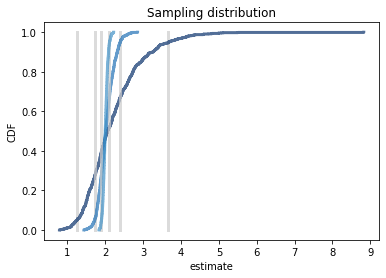

In [57]:
# This starts the results for 8-2 (trying to make it easier to grade)
## now we are going to try an exponential distribution with a lambda of 2. Also notable we are increasing our sample size to 10. But we will iterate 1000 times.
# Solution goes here
def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

#Checking the CI when n = 100
SimulateSample(lam=2, n=100, iters=1000)

# Checking the CI when n = 1000
SimulateSample(lam=2, n=1000, iters=1000)

# Note you can see how the intervals change in the graph the graph gets narrower
# as we increase the number of samples.
# my graph includes n = 100 and n = 1000.
# You can remove the above two lines to make it look like the solution manual if you want.

In [16]:
'''
(More results for 8-2) More will follow at the end of the code.

Very cool above I believed that the error would come down if we increased our sample size n. Its cool to
see that confirmed.

Both the standard error and the confidence interval goes down. I belive that the confidence interval
is used to try and capture the population mean without polling every single member of the population.

Its like it is honing in on that mean. (We are 90% confident that our population mean lives within these values.)

The author states that the actual value is 2 so you can see that it is within this interval in all of the cases below.

n = 10 iterations = 1000
standard error 0.798468417618218
confidence interval (1.252006106568527, 3.6672288013764187)

n = 100 iterations = 1000
standard error 0.21251840983364487
confidence interval (1.7195548388007402, 2.390962077538483)

n = 1000 iterations = 1000
standard error 0.06457437374553801
confidence interval (1.8966540463994075, 2.1086456154424384)

As you can see it is getting closer and closer to the actual value of 2 as n increases.
Also again our CI is capturing the actual value of 2.
'''


**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [58]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [59]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L
# Solution goes here

Experiment 4
rmse L 1.4143659356757712
mean error L -0.000221


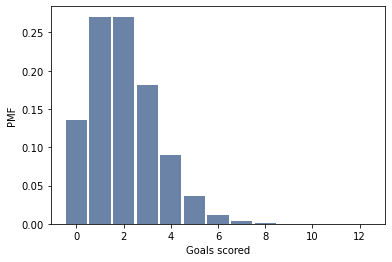

In [60]:
def Estimate6(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))

    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')

Estimate6()
# Solution goes here

In [ ]:
# (Final Results for 8-2)
## Interesting so we found an RMSE 1.4143659356757712
# This means that we are interested in the average time it takes to score a goal.
# I feel that this is pretty unbiased since our standard error is small.
# -0.000221 is smaller than a p-value of .001. So I would be confident with these results.
# (Nice the solution manual confirmed this. I always try and come up with my conclusions before I read the authors.)
# Above we used random.expovariate to build our distribution.
#from the python documentation that makes total sense because we were looking for an exponential distribution.
# Exponential distribution. lambd is 1.0 divided by the desired mean. It should be nonzero. (The parameter would be called “lambda”, but that is a reserved word in Python.) Returned values range from 0 to positive infinity if lambd is positive, and from negative infinity to 0 if lambd is negative.
# I read up on Poisson and its interesting. I think what the author is trying to tell me is.
# Since we believe in our exponential results we can also infer that the average time for goals wont change.
# The wiki that the author suggested gave a scenario that talked about independance of events following an exponential distribution.
'''
(From the wiki)
An individual keeping track of the amount of mail they receive each day may notice that they receive an
average number of 4 letters per day. If receiving any particular piece of mail does not affect the arrival times of
future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another,
then a reasonable assumption is that the number of pieces of mail received in a day obeys a Poisson distribution.
'''
# This means that since goals scored are independent events meaning that one score does not influence the next.
# Since our data was built on an exponential distribution we can say that it follows the same rules as a poisson distribution.
# I did wonder about a few things though considering the histogram of the PMF. You can see that it looks to be skewed right.
# Does this matter to us should we be seeing if it looks more normal if we were to apply a log function? Or is the only goal
# to capture the mean?

